In [197]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [198]:
# data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\res_theo_exp1.csv")
data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\sim_all_no_noise.csv")
data.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23',
             'b20','b21','b22','b23','b24','b25','i0','i1','i2']
data=data[data.pxt<=0.06]
data=data.drop_duplicates()
print(data.shape)

(169271, 28)


In [199]:
data2=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\sim_i2_noise.csv")
data2.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23',
             'b20','b21','b22','b23','b24','b25','i0','i1','i2']
data2=data2[data2.pxt<=0.06]
data2=data2.drop_duplicates()
print(data2.shape)

(169271, 28)


In [275]:
data=data[['pep','cpxt','pxt','delta1','delta2','i0','i1','i2']]
data2=data2[['pep','cpxt','pxt','delta1','delta2','i0','i1','i2']]

temp_merged=data.merge(data2,on=['pep','pxt'])
print(temp_merged.shape)


(169271, 14)


In [276]:
# temp_merged=temp_merged[temp_merged.pxt==temp_merged.pxt.unique()[0]]

In [277]:
# for c in ['delta1','delta2','i0','i1','i2']:
#     print(c, sum(temp_merged[c+"_x"] - temp_merged[c+"_y"]))

In [278]:
# temp_merged

In [279]:
# pd_pxt=100*abs(temp_merged.pxt - temp_merged.cpxt_y)/temp_merged.pxt
# pd_delta2=100*abs(temp_merged.delta2_x - temp_merged.delta2_y)/temp_merged.delta2_x

# df=pd.DataFrame([pd_pxt,pd_delta2]).transpose()
# df.columns=['pxt','delta2']
# # df=df[df.pxt<20]

In [280]:
# plt.scatter(df.pxt,df.delta2)
# plt.xlim([0,2000000])

In [281]:
# df=pd.DataFrame([pd_pxt,pd_delta2]).transpose()
# df.columns=['pxt','delta2']
# df=df[df.delta2<1]
# plt.scatter(df.pxt,df.delta2)

In [282]:
# temp=temp_merged[temp_merged.pxt==temp_merged.pxt.unique()[10]]
# # temp=temp_merged[temp_merged.pep==temp_merged.pep[10]]
# temp2=temp[100*abs(temp.cpxt_y-temp.pxt)/temp.pxt <=15]

# plt.scatter(temp.pxt,temp.delta2_y,s=10,c='r')
# plt.scatter(temp.pxt+0.001,temp.delta2_x,c='k')
# plt.scatter(temp2.pxt+0.002,temp2.delta2_y,s=10,c='g')

In [283]:
# pxt        =  0.0081
# delta2_x   =0.093098
# delta1_x   =0.130699
# i1_x       =0.333162
# i0_x       =0.426094
# i2_x       =0.161082
def new_pxt(pxt,delta2_x,delta1_x,i1_x,i0_x,i2_x):
    return 1 +(0.5/( (delta2_x/delta1_x) - (i1_x/i0_x) + (0.5*delta1_x) - 0.5))

In [284]:
# x=0.093098
# res=[]
# xs=[]
# for i in range(1,50):
#     xs.append(x+i*x/100)
#     res.append(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x))
# for i in range(1,50):
#     xs.append(x-i*x/100)
#     res.append(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x))
# plt.scatter(xs,res)
# plt.vlines(x+0.15*x,ymin=min(res),ymax=max(res))
# plt.vlines(x-0.15*x,ymin=min(res),ymax=max(res))

In [285]:
# index=153
# pxt        =temp_merged.pxt[index]
# delta2_x   =temp_merged.delta2_x[index]
# delta1_x   =temp_merged.delta1_x[index]
# i1_x       =temp_merged.i1_x    [index]
# i0_x       =temp_merged.i0_x    [index]
# i2_x       =temp_merged.i2_x    [index]
# print(delta2_x,pxt)
# x=delta2_x
# res=[]
# xs=[]
# for i in range(1,10):
#     xs.append(x+i*x/1000)
#     res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)    
#     xs.append(x-i*x/1000)
#     res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)  
# for i in range(1,10):
#     xs.append(x+i*x/100)
#     res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)  
#     xs.append(x-i*x/100)
#     res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)  
    

# plt.scatter(delta2_x,pxt,c='m')
# plt.scatter(xs,res)
# plt.hlines(pxt+0.15*pxt,xmin=min(xs),xmax=max(xs))
# plt.hlines(pxt-0.15*pxt,xmin=min(xs),xmax=max(xs))

# # plt.vlines(delta2_x-0.15*delta2_x,ymin=min(res),ymax=max(res))

# df=pd.DataFrame([xs,res]).transpose()
# df.columns=['xs','res']
# df=df[ df.res>20]
# plt.scatter(df['xs'],df.res,c='r')
# plt.ylim([-20,100])

In [286]:
# df

In [287]:
temp_res=[]
temp_pxt=[]
for index in range(1000):#temp_merged.shape[0]):
    pxt        =temp_merged.pxt[index]
    delta2_x   =temp_merged.delta2_x[index]
    delta1_x   =temp_merged.delta1_x[index]
    i1_x       =temp_merged.i1_x    [index]
    i0_x       =temp_merged.i0_x    [index]
    i2_x       =temp_merged.i2_x    [index]
#     print(delta2_x,pxt)
    x=delta2_x
    res=[]
    xs=[]
    for i in range(1,1000):
        xs.append(x+i*x/1000)
        res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)    
        xs.append(x-i*x/1000)
        res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)  
    for i in range(1,10):
        xs.append(x+i*x/100)
        res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)  
        xs.append(x-i*x/100)
        res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)  


    df=pd.DataFrame([xs,res]).transpose()
    df.columns=['xs','res']
    df=df[ df.res<20]
    
    if df.shape[0]>0:
        temp=(max(list(df['xs'])))
        print(index)
        temp_res.append(temp)
        temp_pxt.append(pxt)
#         if temp >2:
#             print(index,temp,pxt)
#             plt.scatter(delta2_x,pxt,c='m')
#             plt.scatter(xs,res)
#             plt.hlines(20,xmin=min(xs),xmax=max(xs))
#     #         plt.hlines(pxt+0.15*pxt,xmin=min(xs),xmax=max(xs))
#     #         plt.hlines(pxt-0.15*pxt,xmin=min(xs),xmax=max(xs))

#             plt.scatter(df['xs'],df.res,c='r')
#             plt.ylim([-20,200])
#             plt.show()
            

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319

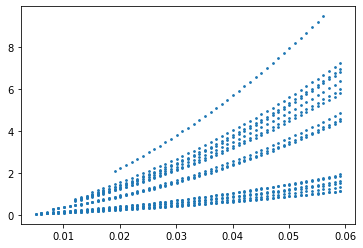

In [288]:
plt.scatter(temp_pxt,temp_res,s=3)

In [64]:
df=pd.DataFrame([xs,res]).transpose()
df.columns=['xs','res']
df=df[ df.res<20 ]
df

,xs,res
0,1.135468,0.709257
1,1.135468,0.709257


In [24]:
res

[0.0423985972034171]

In [528]:
def new_pxt(delta2_x,delta1_x,i1_x,i0_x):
    return 1 +(0.5/( (delta2_x/delta1_x) - (i1_x/i0_x) + (0.5*delta1_x) - 0.5))

In [426]:
k=58
temp_merged=data.merge(data2,on=['pep','pxt'])
temp_merged=temp_merged.loc[k:k,:]
temp_merged=temp_merged.reset_index(drop=True)
temp_merged

,pep,cpxt_x,pxt,delta1_x,delta2_x,i0_x,i1_x,i2_x,cpxt_y,delta1_y,delta2_y,i0_y,i1_y,i2_y
0,DSTLIMQLLR,0.0591,0.0591,1.005318,1.128255,0.183086,0.303286,0.258738,0.073977,1.005318,1.119669,0.183086,0.303286,0.257166


In [414]:
temp_res=[]
temp_pxt=[]
for index in range(1):#temp_merged.shape[0]):
    pxt        =temp_merged.pxt[index]
    delta2_x   =temp_merged.delta2_x[index]
    delta1_x   =temp_merged.delta1_x[index]
    i1_x       =temp_merged.i1_x    [index]
    i0_x       =temp_merged.i0_x    [index]
    i2_x       =temp_merged.i2_x    [index]
    x=delta2_x
    res=[]
    xs=[]
    ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x) 
    print(ccpxt,pxt)
    
#     for i in range(1,10):        
#         xs.append(x+i*x/100)        
#         temp_res.append(i)
#         temp_pxt.append( 100*abs(new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)          
#         xs.append(x-i*x/100)
#         temp_res.append(i)
#         temp_pxt.append( 100*abs(new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)  
    for i in range(1,100):        
        xs.append(x+i*x/1000)        
        temp_res.append( 100*abs(x - (x+i*x/1000))/x)
        temp_pxt.append( 100*abs(new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)
#         print(i,ccpxt,new_pxt(xs[-1],delta1_x,i1_x,i0_x),temp_pxt[-1])          
        
        xs.append(x-i*x/1000)
        temp_res.append( 100*abs(x - (x -i*x/1000))/x)
        temp_pxt.append( 100*abs(new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt) 
#         print(i,ccpxt,new_pxt(xs[-1],delta1_x,i1_x,i0_x),temp_pxt[-1],end="\n\n") 
    

0.05639445154906375 0.0561


In [421]:
df=pd.DataFrame([temp_pxt,temp_res]).transpose()
df.columns=['xs','res']
df=df[ df['xs']<20 ]
print(df.res.max())
df.sort_values(by='xs')

0.5000000000000024


,xs,res
1,3.456692,0.1
0,3.471034,0.1
3,6.899131,0.2
2,6.956498,0.2
5,10.327405,0.3
4,10.456484,0.3
7,13.741602,0.4
6,13.971081,0.4
9,17.141808,0.5
8,17.500383,0.5


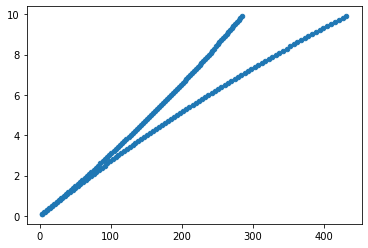

In [418]:
plt.scatter(df['xs'],df.res,s=20)
# plt.xlim([0,500])
# plt.ylim([0,100])

In [530]:
def new_pxt(delta2_x,delta1_x,i1_x,i0_x):
    return 1 +((delta1_x*0.5)/( (delta2_x) - (delta1_x*i1_x/i0_x) + (0.5*delta1_x*delta1_x) - 0.5*delta1_x))
    

In [542]:
all_res=[]
for k in range(20,21):#59
    k=k + 0*59
    temp_merged=data.merge(data2,on=['pep','pxt'])
    temp_merged=temp_merged.loc[k:k,:]
    temp_merged=temp_merged.reset_index(drop=True)
#     print(k,temp_merged.pep)
    
    temp_res=[]
    temp_pxt=[]
    for index in range(1):#temp_merged.shape[0]):
        pxt        =temp_merged.pxt[index]
        delta2_x   =temp_merged.delta2_x[index]
        delta1_x   =temp_merged.delta1_x[index]
        i1_x       =temp_merged.i1_x    [index]
        i0_x       =temp_merged.i0_x    [index]
        i2_x       =temp_merged.i2_x    [index]
        x=delta2_x
        res=[]
        xs=[]
        ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x) 
#         print(pxt,ccpxt)
         
        for i in range(1,50):        
            xs.append(x+i*x/1000)        
            temp_res.append( 100*abs(x - (x+i*x/1000))/x)
            temp_pxt.append( 100*abs(new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)
            print('\t',pxt,ccpxt,delta2_x,xs[-1],temp_res[-1],new_pxt(xs[-1],delta1_x,i1_x,i0_x),temp_pxt[-1])

            xs.append(x-i*x/1000)
            temp_res.append( 100*abs(x - (x -i*x/1000))/x)
            temp_pxt.append( 100*abs(new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt) 
#             print('\t',pxt,ccpxt,delta2_x,xs[-1],temp_res[-1],new_pxt(xs[-1],delta1_x,i1_x,i0_x),temp_pxt[-1])
    df=pd.DataFrame([temp_pxt,temp_res]).transpose()
    all_res.append([temp_res,temp_pxt])
#     df=pd.DataFrame([temp_pxt,temp_res]).transpose()
#     df.columns=['xs','res']
#     df=df[ df['xs']<20 ]
#     all_res.append([pxt,df.shape[0],df.res.max()])


	 0.0211 0.021404930120316967 0.280388835301163 0.28066922413646417 0.10000000000000674 0.019845782282865487 7.284059460542597
	 0.0211 0.021404930120316967 0.280388835301163 0.2809496129717653 0.19999999999999366 0.018281658288603397 14.591366634498128
	 0.0211 0.021404930120316967 0.280388835301163 0.2812300018070665 0.3000000000000004 0.016712534276692836 21.922032995427713
	 0.0211 0.021404930120316967 0.280388835301163 0.28151039064236766 0.4000000000000071 0.01513838623350161 29.27617073072024
	 0.0211 0.021404930120316967 0.280388835301163 0.2817907794776688 0.49999999999999406 0.013559189991376619 36.65389274732268
	 0.0211 0.021404930120316967 0.280388835301163 0.28207116831296997 0.6000000000000008 0.011974921227406843 44.05531267751919
	 0.0211 0.021404930120316967 0.280388835301163 0.28235155714827115 0.7000000000000075 0.010385555462175677 51.48054488476001
	 0.0211 0.021404930120316967 0.280388835301163 0.2826319459835723 0.7999999999999945 0.008791068058499718 58.9297044

In [543]:
# pd.DataFrame(all_res).transpose()
df=pd.DataFrame()
for x in all_res:
    df=pd.concat([df,pd.DataFrame(x)],axis=1)
df=df.transpose()
df.columns=['er','px']

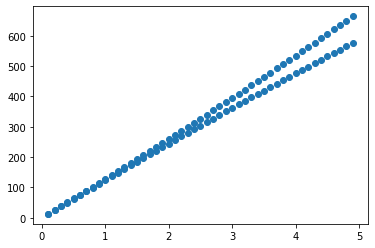

In [540]:
plt.scatter(df.er,df.px)

In [518]:
# all_res=pd.DataFrame(all_res)
# all_res.columns=['pxt','s','p']
# all_res=all_res.dropna()
# print(all_res.shape)
# plt.scatter(all_res.pxt,all_res.p)
# # plt.ylim([0,100])

In [475]:
1e-12+4.9

4.9000000000010004